In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the Libraries 

In [38]:
#Importing the data in Notebook

data = {
    "Student": ["Om", "Raj", "Keya", "Neha", "Om", None, "Raj", "Neha"],
    "City": ["Ahmedabad", "Mumbai", "Delhi", "Ahmedabad", "Delhi", "Mumbai", None, "Delhi"],
    "Subject": ["Math", "Science", "Math", "Science", "Math", "Math", "Science", "Math"],
    "Marks": [85, 90, 88, np.nan, 92, 75, 80, 70],
    "Attempts": [1, 2, 1, 3, 1, 1, 2, 1]
}

df = pd.DataFrame(data)
print("RAW Data:\n" , df)

RAW Data:
   Student       City  Subject  Marks  Attempts
0      Om  Ahmedabad     Math   85.0         1
1     Raj     Mumbai  Science   90.0         2
2    Keya      Delhi     Math   88.0         1
3    Neha  Ahmedabad  Science    NaN         3
4      Om      Delhi     Math   92.0         1
5    None     Mumbai     Math   75.0         1
6     Raj       None  Science   80.0         2
7    Neha      Delhi     Math   70.0         1


In [39]:
print(df.isnull().sum()) #Missing value check

Student     1
City        1
Subject     0
Marks       1
Attempts    0
dtype: int64


In [40]:
df["Student"].fillna("Unknown", inplace=True)
df["City"].fillna("Unknown", inplace=True)
df["Marks"].fillna(df["Marks"].mean(), inplace=True)

C:\Users\Om Panchal\AppData\Local\Temp\ipykernel_17108\4180266262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Student"].fillna("Unknown", inplace=True)
C:\Users\Om Panchal\AppData\Local\Temp\ipykernel_17108\4180266262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [41]:
df.drop_duplicates(inplace=True) #Duplicates removed

In [42]:
df["Result"] = np.where(df["Marks"] >= 80,"Pass","Fail" )
print(df)
#Calculate the new column

   Student       City  Subject      Marks  Attempts Result
0       Om  Ahmedabad     Math  85.000000         1   Pass
1      Raj     Mumbai  Science  90.000000         2   Pass
2     Keya      Delhi     Math  88.000000         1   Pass
3     Neha  Ahmedabad  Science  82.857143         3   Pass
4       Om      Delhi     Math  92.000000         1   Pass
5  Unknown     Mumbai     Math  75.000000         1   Fail
6      Raj    Unknown  Science  80.000000         2   Pass
7     Neha      Delhi     Math  70.000000         1   Fail


In [43]:
print("\nSTATISTICS:\n", df.describe())



STATISTICS:
            Marks  Attempts
count   8.000000  8.000000
mean   82.857143  1.500000
std     7.567384  0.755929
min    70.000000  1.000000
25%    78.750000  1.000000
50%    83.928571  1.000000
75%    88.500000  2.000000
max    92.000000  3.000000


In [44]:
#Groupby () 

print(df.groupby("City")["Marks"].mean())
print(df.groupby("Subject")["Result"].value_counts())

City
Ahmedabad    83.928571
Delhi        83.333333
Mumbai       82.500000
Unknown      80.000000
Name: Marks, dtype: float64
Subject  Result
Math     Pass      3
         Fail      2
Science  Pass      3
Name: count, dtype: int64


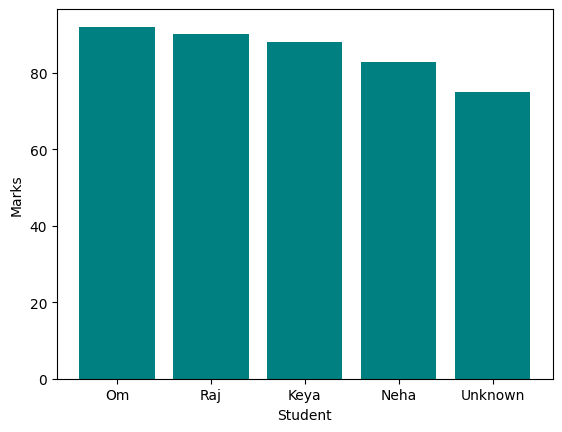

In [45]:
#Data visulization 
plt.Figure(figsize=(6,4))
plt.bar(df["Student"],df["Marks"],color= 'teal')
plt.xlabel ("Student")
plt.ylabel ("Marks")
plt.show()

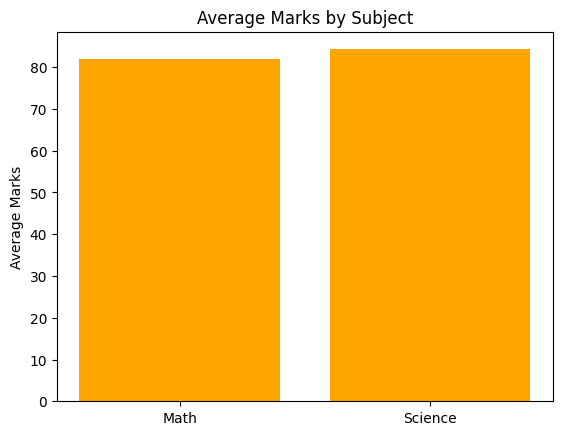

In [46]:
avg_subject = df.groupby("Subject")["Marks"].mean()

plt.bar(avg_subject.index, avg_subject.values, color='orange')
plt.title("Average Marks by Subject")
plt.ylabel("Average Marks")
plt.show()


1 Most students scored above average — pass rate is high.  
2️ Delhi and Mumbai students show slightly higher averages compared to Ahmedabad.  
3️ Science marks vary more across students, indicating performance gap.  
4️ Keya and Raj performed consistently well across subjects.  
5️Attempts do not significantly affect marks in this dataset.
